# 算法原理

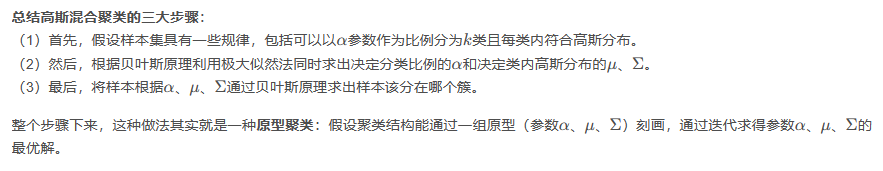

假设数据点分为四个组，如图一所示。有两种或更多种解释数据的方式。图一是K-means的方式。它假设有固定数量的簇，本例中为四个簇。然后将每个数据点分配给一个簇。图二是GMM的方式。它假设有固定数量的具有不同均值和标准差的高斯分布。在我们的例子中，它假设有四个分布。

我将图一和图二垂直对齐，以比较GMM和K-means。GMM用四个分布的概率描述一个数据点，而K-means将一个数据点识别为一个且仅一个簇。假设一个数据点在最左端。K-means会说它属于簇1，而GMM可能会说它有90%的概率来自红色分布，9%的概率来自橙色分布，0.9%的概率来自蓝色分布，0.1%的概率来自绿色分布，或者[90%，9%，0.9%，0.1%]的概率来自[红色，橙色，蓝色，绿色]分布。K-means可以被认为是GMM的一个特例，因为一个数据点属于一个簇的概率为1，而其他概率为0。或者我们可以说K-means执行硬分类，而高斯执行软分类。

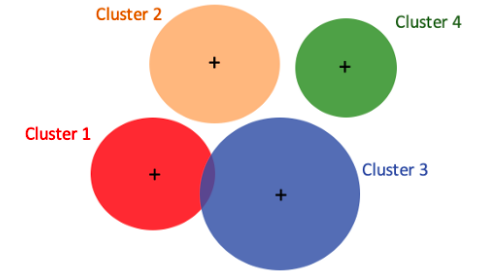
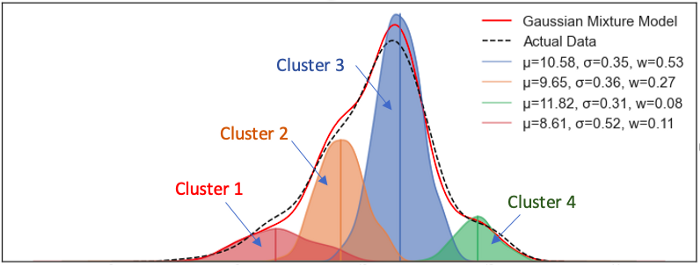

使用GMM的另一个动机是当实例的分布是多峰的，即数据分布中存在多个“峰值”。多峰分布看起来像是一种混合了单峰分布的分布。高斯分布是单峰的，并且具有许多良好的性质，因此在混合模型中是一个很好的选择。

我们不知道GMM中的概率z = [90%，9%，0.9%，0.1%]，我们甚至不知道每个高斯分布的均值µ和方差⍴。此刻我们唯一知道的是有四个高斯分布。好消息是，概率z，均值µ和方差⍴都可以通过我即将介绍的期望最大化算法进行估计。有了这个解决方案，我们可以说一个数据点有[90%，9%，0.9%，0.1%]的机会来自这四个分布之一。

如果z是已知的，我们可以预测一个数据点x。它表示为p(x|z)，并且读作“给定z，x的概率是p(x|z)”。但是我们想要知道的是相反的情况：给定一个数据点x，它属于哪个分布的概率是多少。它表示为p(z|x)，并且读作“给定一个数据点x，它属于z的概率是p(z|x)”。我想提醒读者条件概率p(x|z)并不是新的。它是任何机器学习模型的本质。让我们以逻辑回归Y = a + bX为例。a和b是类似于z的参数，或者z=(a,b)。对于Y的预测是“给定参数a和b，当X的值为x时的预测”，或者p(X=x|a,b)。

我们如何得到p(z|x)？这就是贝叶斯定理的作用。英国长老会牧师、统计学家和哲学家托马斯·贝叶斯（约1701年-1761年）通过数学方法找到了p(z|x)和p(x|z)之间的关系。

有三组未知参数需要估计：(z, µ, σ*)。为了估计标准高斯分布中的(µ, σ*)，我们可以使用最大对数似然估计（MLE）。您可能已经在线性回归中学过MLE。现在有一个额外的未知参数z，我们可以先猜测z的任何值，并应用MLE来估计(µ, σ*)。然后，θ = (µ, σ*)被反馈回来计算和更新z。更新后的z在MLE中用于估计θ = (µ, σ*)。这个迭代过程被称为期望最大化算法。

在高斯分布中，θ是未知的均值和方差，即θ = (µ, σ*)。假设有独立同分布（i.i.d.）的随机样本x1、x2、⋯、xn，每个xi的概率密度函数（p.d.f）是f(xi;θ)，这意味着在参数θ = (µ, σ*)的高斯分布中样本xi的概率。所有观察到的样本x1、x2、⋯、xn的联合概率密度函数称为L(θ)：
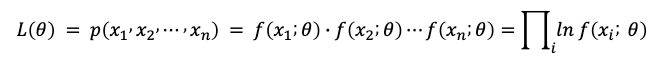
MLE是一种算法，用于找到最大化上述联合密度概率的θ。或者我们可以说MLE找到了这些样本最有可能来自的最优θ。在下图中，有蓝色的点和所有可能的高斯分布以及它们的(µ, σ)。哪个高斯分布最有可能是蓝色点来自的？MLE是找到(µ, σ)的算法。
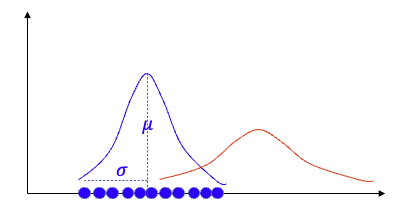
由于独立同分布性质，联合密度概率可以表示为各个密度函数的乘积。独立同分布性质是一个很好的假设，使得许多优化问题变得可处理。它意味着样本xi的抽取与其他样本无关。在许多应用中，这个假设并不太离谱。

最后，通过分别对(µ, σ*)求导并将每个导数设为零，我们可以解出(µ, σ)*的值。

但是，如果我们不知道数据点来自多个分布中的哪一个，估计就变得更加复杂。即便如此，我们仍然可以使用一种称为期望最大化 (Expectation-Maximization, E-M) 的算法来推导参数。EM算法使用贝叶斯统计学。它有以下两个步骤（E-M）。

E步骤：为数据点属于某个分布的概率分配一个初始“猜测”。给定这个猜测，可以制定MLE。例如，在上图中，数据点来自红色、橙色、蓝色和绿色分布的概率的初始猜测可以是z = (0.25, 0.25, 0.25, 0.25)。数据点属于分布的概率是后验概率。E步骤只需将值代入方程(1)以获得p(z|x)。我们知道单个高斯分布的MLE。因为z是已知的，多个高斯分布的MLE实际上是z中的概率乘以每个高斯分布的MLE。它是MLE的加权和，权重是z中的值。

M步骤：这一步是用于估计参数(µ,⍴)的标准MLE。新的参数被输入到E步骤中再次分配后验概率。E步骤和M步骤将迭代重复直到收敛。


# 数据准备

In [1]:
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans # k均值
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]
# 设置正常显示符号
mpl.rcParams["axes.unicode_minus"] = False

In [2]:
#读取数据
data = pd.read_csv("../data/blobs.csv")
print(data.head())

           a         b  label
0  -0.794152  2.104951      0
1  -9.151552 -4.812864      1
2 -11.441826 -4.457814      1
3  -9.767618 -3.191337      1
4  -4.536556 -8.401863      2


In [3]:
#准备数据
data = data.dropna()
y = data['label']
x = data.drop(['label'],axis=1).astype('float64')

# 训练集、测试集划分
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state= 42)

## 肘部法获取最佳聚类数

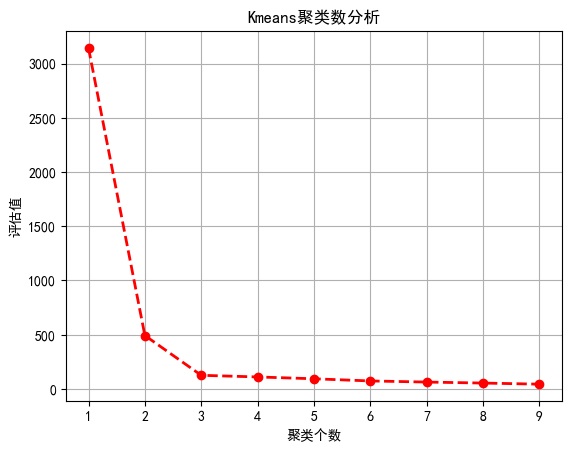

In [4]:
#使用SSE进行模型评估,
sse=[]
for i in range(1,10):
    cluster=KMeans(n_clusters=i,random_state=0, n_init= 'auto').fit(x_train)
    inertia=cluster.inertia_
    sse.append(inertia)
plt.plot(range(1,10),sse,color='red',linewidth=2.0,linestyle='--',marker='o',label='sse')
plt.grid(True)
plt.title("Kmeans聚类数分析")
plt.xlabel("聚类个数")
plt.ylabel("评估值")
plt.savefig("../images/Kmeans聚类数分析.png", dpi=600)
plt.show()

由上图可知，k=3为最佳。

# 模型训练

In [46]:
# 聚类模型
k = 3
model = GaussianMixture(n_components=k)
model.fit(x_train)

GaussianMixture(n_components=3)

Text(0, 0.5, 'Feature 1')

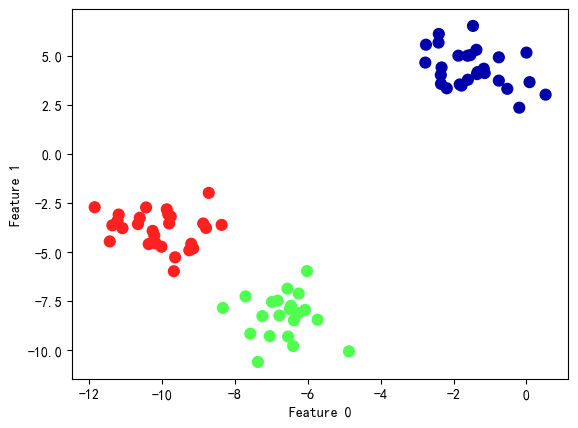

In [47]:
# 绘制聚类结果图
clusters = model.predict(x_train)
plt.scatter(x_train.values[:,0], x_train.values[:,1], c=clusters, cmap=mglearn.cm3, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# 模型保存

In [48]:
# 法一
import joblib

# 保存模型
joblib.dump(model, '../outputs/best_models/gmm.pkl')

# 加载模型
model = joblib.load('../outputs/best_models/gmm.pkl')

In [49]:
# 法二
import pickle

with open('../outputs/best_models/gmm.pkl', 'wb') as f:
    pickle.dump(model, f)

#读取Model
with open('../outputs/best_models/gmm.pkl', 'rb') as f:
    model = pickle.load(f)

# 模型预测

In [50]:
prediction = model.predict(x_test)

In [51]:
# 计算准确率
acc = accuracy_score(y_test, prediction)
print("acc为：", acc)

acc为： 1.0


In [52]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

